[View in Colaboratory](https://colab.research.google.com/github/upadhyayprakash/EIP/blob/master/4A_1_Try_98_37_67508.ipynb)

**Assigment 4A of EIP Batch 3 - Prakash Upadhyay**</br>
**Task: ** Beat the Validation Score of **98.29%** accuracy by using lesser parameters than **68,260**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


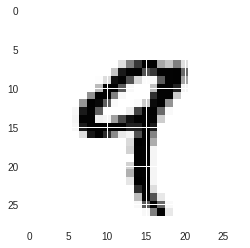

In [119]:
#print (y_train)
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[4])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [122]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [124]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [125]:
from keras.layers import Activation
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(26,26,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 24))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(26, 26, 1...)`
  after removing the cwd from sys.path.


In [126]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 10)        330       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 1, 1, 10)          57610     
_________________________________________________________________
flatten_10 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_10 (Activation)   (None, 10)                0         
Total params: 67,508
Trainable params: 67,508
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [128]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.1568 - acc: 0.9531
Epoch 2/10
50816/60000 [========================>.....] - ETA: 3s - loss: 0.0610 - acc: 0.9817

60000/60000 [==============================] - 21s 358us/step - loss: 0.0601 - acc: 0.9818
Epoch 3/10
60000/60000 [==============================] - 22s 362us/step - loss: 0.0423 - acc: 0.9869
Epoch 4/10
12704/60000 [=====>........................] - ETA: 17s - loss: 0.0306 - acc: 0.9904

60000/60000 [==============================] - 22s 360us/step - loss: 0.0319 - acc: 0.9899
Epoch 5/10
60000/60000 [==============================] - 22s 361us/step - loss: 0.0235 - acc: 0.9924
Epoch 6/10
 1632/60000 [..............................] - ETA: 21s - loss: 0.0190 - acc: 0.9926

60000/60000 [==============================] - 22s 362us/step - loss: 0.0182 - acc: 0.9939
Epoch 7/10
57344/60000 [===========================>..] - ETA: 0s - loss: 0.0143 - acc: 0.9950

60000/60000 [==============================] - 22s 363us/step - loss: 0.0142 - acc: 0.9950
Epoch 8/10
60000/60000 [==============================] - 22s 363us/step - loss: 0.0110 - acc: 0.9962
Epoch 9/10
14496/60000 [======>.......................] - ETA: 16s - loss: 0.0092 - acc: 0.9969

60000/60000 [==============================] - 22s 362us/step - loss: 0.0095 - acc: 0.9968
Epoch 10/10
60000/60000 [==============================] - 22s 360us/step - loss: 0.0073 - acc: 0.9975


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [130]:
print(score)

[0.08035662183629824, 0.9837]
